In [532]:
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import powerlaw

import arrow

from scipy.special import factorial
from math import e

### Load Project Data

In [533]:
projects = [
    'bayc', 
    'coolcats', 
    'cryptoadz', 
    'cyberkongz', 
    'hashmasks', 
    'mayc', 
    'meebits', 
    'mekaverse', 
    'svs'
]

In [534]:
df_summaries = {}

column_names = [
    "date", 
    "days_since_mint", 
    "from_address", 
    "to_address", 
    "token_id", 
    "blk_number", 
    "eth_value", 
    "usd_value", 
    "from_value", 
    "to_value", 
    "from_value_usd", 
    "to_value_usd"
]

for project in projects:
    np_data = np.load(f"./memory/{project}/full.npy", allow_pickle=True)
    df_summaries[project] = pd.DataFrame(data=np_data, columns=column_names).infer_objects()

### Get project price performance

In [535]:
def get_price_performance_series(project):
    df = df_summaries[project]
    df = df[df['eth_value'] != 0]
    
    df_price = df.groupby('days_since_mint').agg({'token_id': 'count', 'usd_value':'sum'}).reset_index().rename(columns={'token_id':'token_count', 'usd_value': 'aggregrate_usd_value'})
    df_price['usd_per_token'] = df_price['aggregrate_usd_value'] / df_price['token_count']
    
    return (df_price['days_since_mint'], df_price['usd_per_token'])

### ETH inflows over DSM

In [536]:
def plot_eth_over_dsm(dfs):
    sort = lambda x: x.sort_values(by=['days_since_mint'])
    group = lambda x: x.groupby(by=['days_since_mint']).sum()
    
    keys = [key for key in dfs.keys()]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 16), constrained_layout=True)
    fig.suptitle('ETH Inflows over Days Since Mint', y=1.05, fontsize=20)
    
    for i, ax in enumerate(axs.flatten()):
        df = group(sort(dfs[keys[i]]))

        price_x, price_y = get_price_performance_series(keys[i])

        ln1 = ax.plot(df.index, df.eth_value, color='b', label="ETH inflows")
        ax.set_title(keys[i])
        ax.set_yscale("log")
        ax.set_xlabel("days since mint")
        ax.set_ylabel("value inflow (ETH)")

        ax_twin = ax.twinx()
        ln2 = ax_twin.plot(price_x, price_y, color='limegreen', label="token price")
        ax_twin.set_yscale("log")
        ax_twin.set_ylabel("token price (USD)")

        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

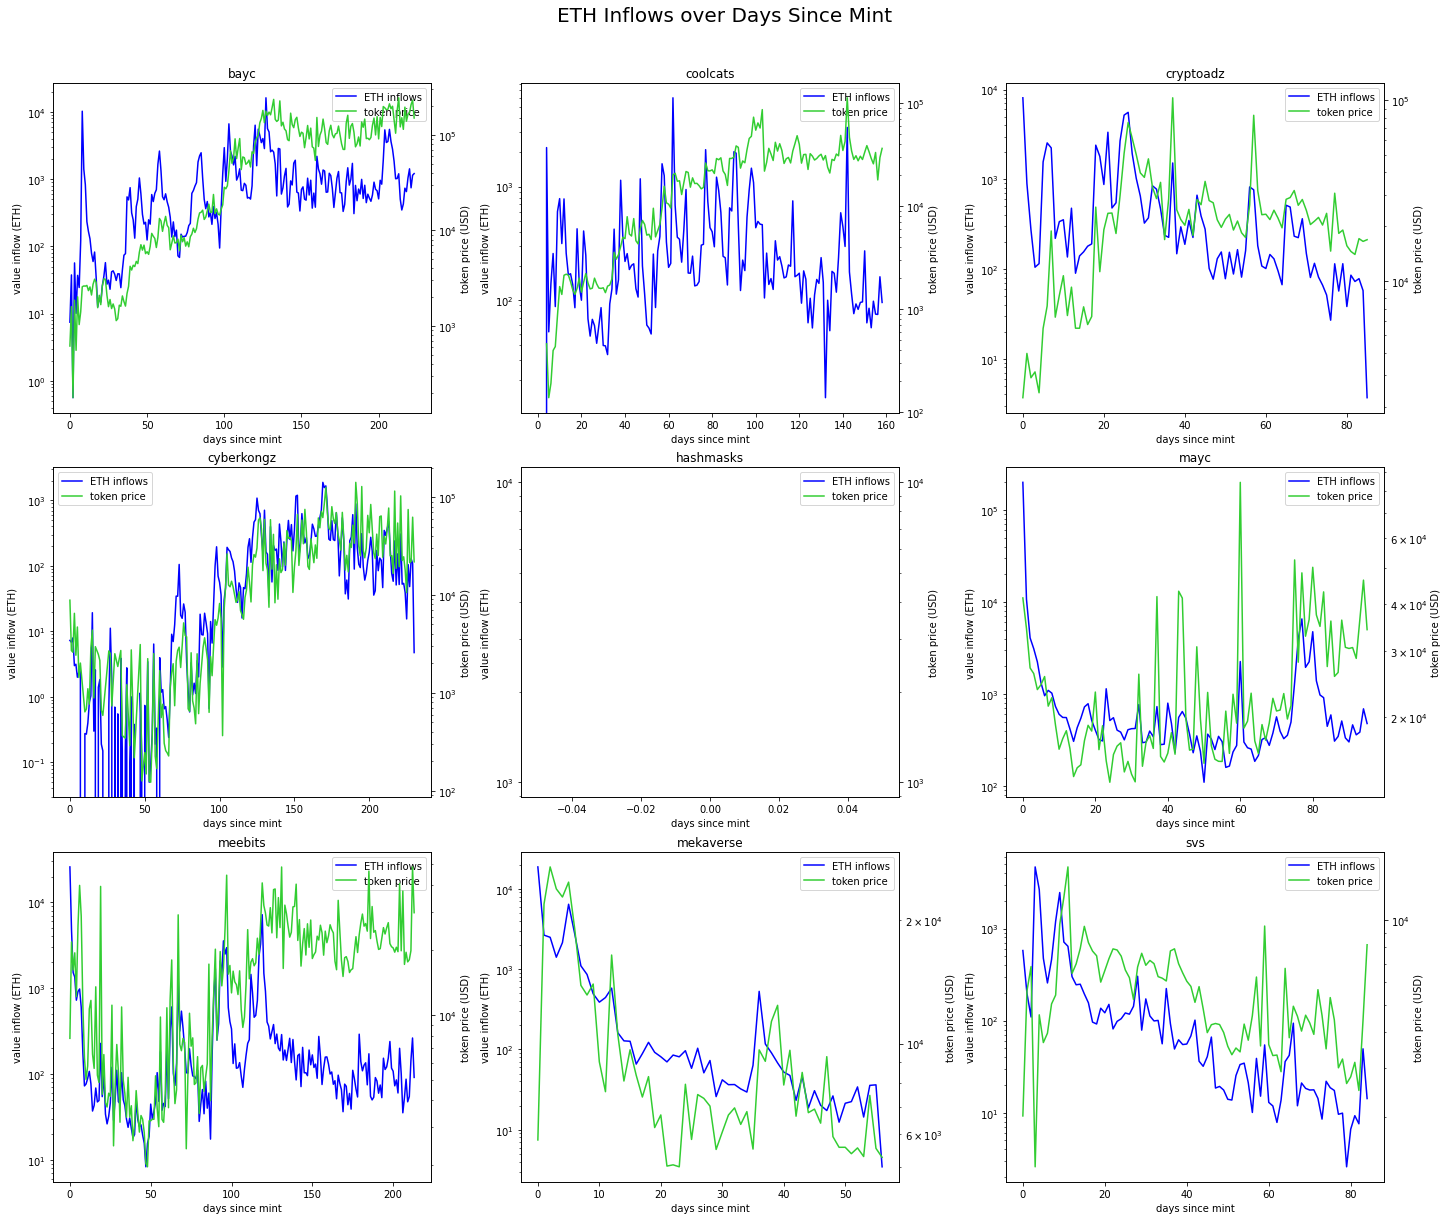

In [537]:
plot_eth_over_dsm(df_summaries)

### Aggregate ETH value over DSM

In [538]:
def get_aggregate_project_value_series(project):
    df = df_summaries[project]
    df_agg = df.groupby('days_since_mint')['eth_value'].sum().reset_index()
    
    x_series = []
    y_series = []
    
    current = 0 
    for i, row in df_agg.iterrows():
        x_series.append(row['days_since_mint'])
        
        current += row['eth_value']
        y_series.append(current)
        
    return (x_series, y_series)

In [539]:
def plot_aggregate_project_value_over_dsm(dfs):
    keys = [key for key in dfs.keys()]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 16), constrained_layout=True)
    fig.suptitle('Aggregate Project Value over Days Since Mint', y=1.05, fontsize=20)
    
    for i, ax in enumerate(axs.flatten()):
        agg_x, agg_y = get_aggregate_project_value_series(keys[i])
        price_x, price_y = get_price_performance_series(keys[i])

        ln1 = ax.plot(agg_x, agg_y, color='b', label="aggregate project value")
        ax.set_title(keys[i])
        ax.set_xlabel("days since mint")
        ax.set_ylabel("aggregrate project value (ETH)")

        ax_twin = ax.twinx()
        ln2 = ax_twin.plot(price_x, price_y, color='limegreen', label="token price")
        ax_twin.set_yscale("log")
        ax_twin.set_ylabel("token price (USD)")

        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

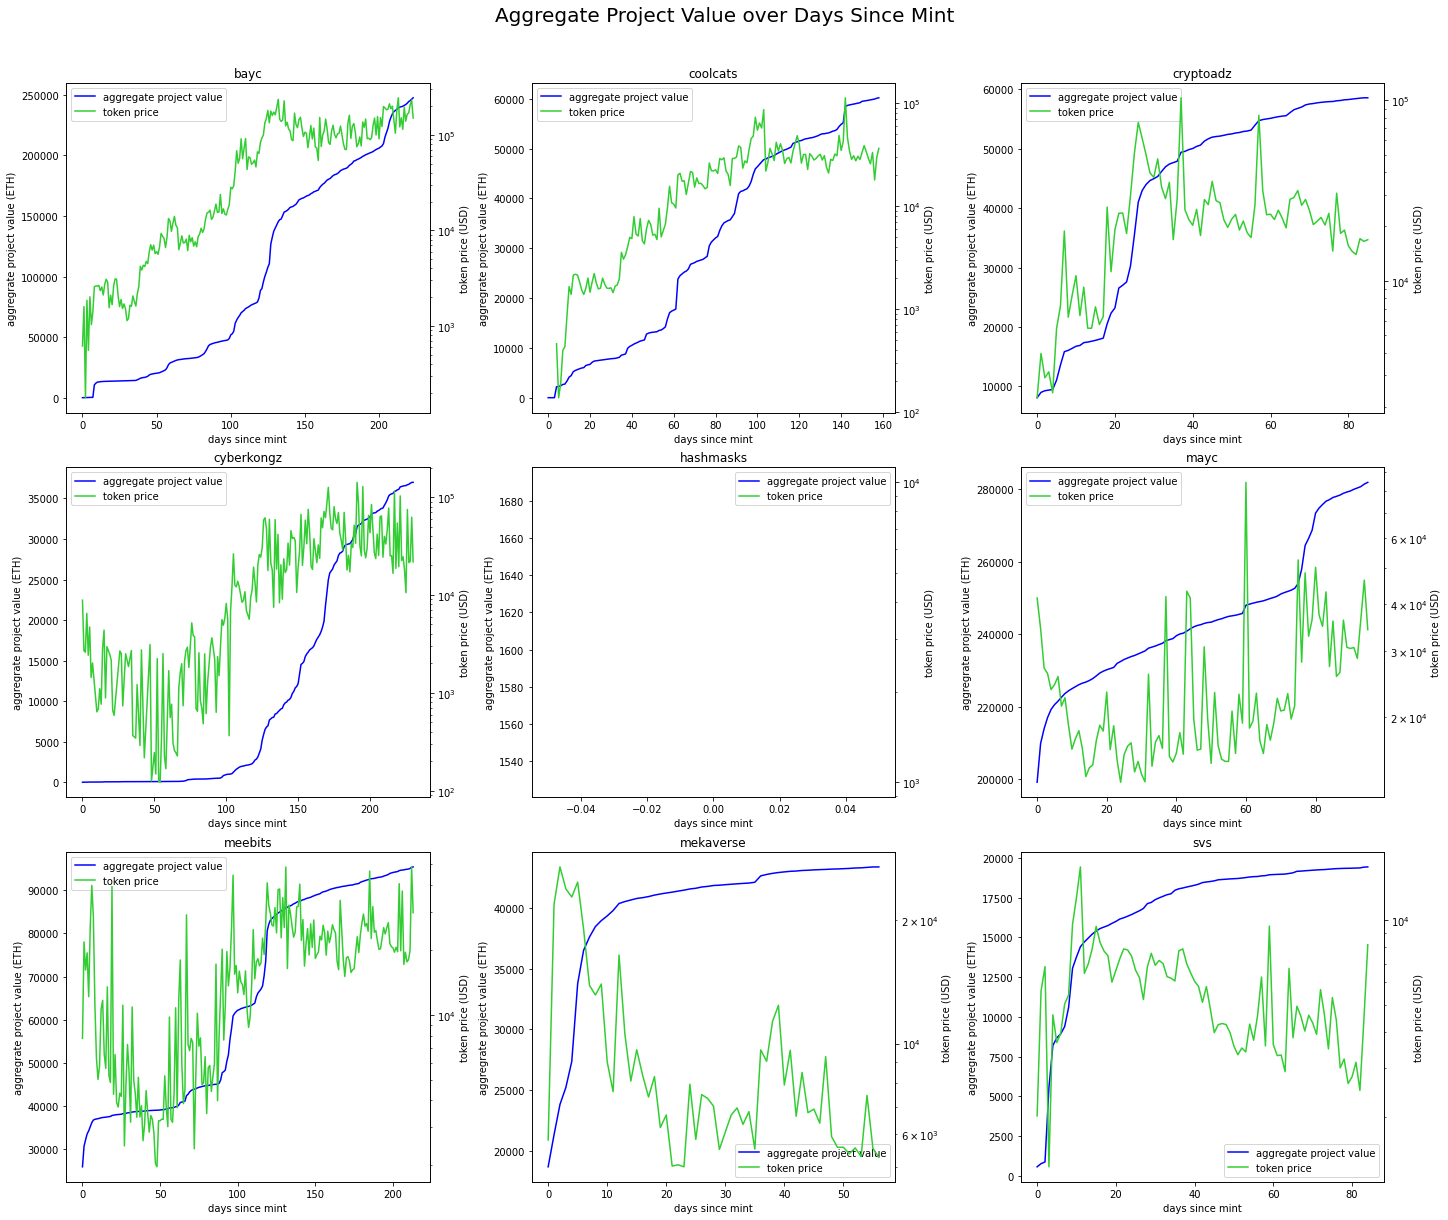

In [540]:
plot_aggregate_project_value_over_dsm(df_summaries)

### USD inflows over DSM

In [541]:
def plot_usd_over_dsm(dfs):
    sort = lambda x: x.sort_values(by=['days_since_mint'])
    group = lambda x: x.groupby(by=['days_since_mint']).sum()
    
    keys = [key for key in dfs.keys()]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 16), constrained_layout=True)
    fig.suptitle('USD Inflows over Days Since Mint', y=1.05, fontsize=20)
    
    for i, ax in enumerate(axs.flatten()):
        df = group(sort(dfs[keys[i]]))

        price_x, price_y = get_price_performance_series(keys[i])

        ln1 = ax.plot(df.index, df.usd_value, color='b', label="USD inflows")
        ax.set_title(keys[i])
        ax.set_yscale("log")
        ax.set_xlabel("days since mint")
        ax.set_ylabel("value inflow (USD)")

        ax_twin = ax.twinx()
        ln2 = ax_twin.plot(price_x, price_y, color='limegreen', label="token price")
        ax_twin.set_yscale("log")
        ax_twin.set_ylabel("token price (USD)")

        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

In [ ]:
plot_usd_over_dsm(df_summaries)

### Number of transactions over DSM

In [ ]:
def plot_transactions_over_dsm(dfs):
    keys = [key for key in dfs.keys()]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 16), constrained_layout=True)
    fig.suptitle('Transactions over Days Since Mint', y=1.05, fontsize=20)
    
    for i, ax in enumerate(axs.flatten()):
        df = dfs[keys[i]]

        price_x, price_y = get_price_performance_series(keys[i])

        ax.hist(df.days_since_mint, bins=100, color='b', label="transactions")
        ax.set_title(keys[i])
        ax.set_yscale("log")
        ax.set_xlabel("days since mint")
        ax.set_ylabel("number of transactions")

        ax_twin = ax.twinx()
        ln1 = ax_twin.plot(price_x, price_y, color='limegreen', label="token price")
        ax_twin.set_yscale("log")
        ax_twin.set_ylabel("token price (USD)")

        lns = ln1
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

In [ ]:
plot_transactions_over_dsm(df_summaries)

### Unique holders over DSM

In [ ]:
def get_unique_holders_series(project):
    df = df_summaries[project]
    df_holders = df.groupby('days_since_mint')['from_address', 'to_address']
    
    x_series = []
    y_series = []
    
    uniques = set()
    for name, group in df_holders:
        for i, row in group.iterrows():
            uniques.add(row['from_address'])
            uniques.add(row['to_address'])
        
        x_series.append(name)
        y_series.append(len(uniques))
        
    return (x_series, y_series)

In [ ]:
def plot_unique_holders_over_dsm(dfs):
    keys = [key for key in dfs.keys()]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 16), constrained_layout=True)
    fig.suptitle('Unique Holders over Days Since Mint', y=1.05, fontsize=20)
    
    for i, ax in enumerate(axs.flatten()):
        unique_x, unique_y = get_unique_holders_series(keys[i])
        price_x, price_y = get_price_performance_series(keys[i])

        ln1 = ax.plot(unique_x, unique_y, color='b', label="unique holders")
        ax.set_title(keys[i])
        ax.set_yscale("log")
        ax.set_xlabel("days since mint")
        ax.set_ylabel("unique holders")

        ax_twin = ax.twinx()
        ln2 = ax_twin.plot(price_x, price_y, color='limegreen', label="token price")
        ax_twin.set_yscale("log")
        ax_twin.set_ylabel("token price (USD)")

        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

In [ ]:
plot_unique_holders_over_dsm(df_summaries)

### Aggregate holder ETH value over DSM (Whale Watching)

In [ ]:
def get_aggregate_holder_value_series(project):
    ZERO_ADDRESS = '0x0000000000000000000000000000000000000000'
    
    df = df_summaries[project]
    df_agg = df.groupby('days_since_mint')
    
    x_series = []
    y_series = []
    
    already_seen = set()
    
    # Clever trick - we add the 0x0 address here
    already_seen.add(ZERO_ADDRESS)
    
    current = 0
    for name, group in df_agg:
        for i, row in group.iterrows():
            from_address = row['from_address']
            to_address = row['to_address']
            
            from_value = row['from_value'] if not from_address in already_seen else 0
            to_value = row['to_value'] if not to_address in already_seen else 0
            
            already_seen.add(from_address)
            already_seen.add(to_address)
            
            current += (from_value + to_value)
        
        x_series.append(name)
        y_series.append(current)
        
    return (x_series, y_series)

In [ ]:
x, y = get_aggregate_holder_value_series('hashmasks')

df = df_summaries['hashmasks']

print(df)

In [ ]:
def plot_aggregate_holder_value_over_dsm(dfs):
    keys = [key for key in dfs.keys()]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 16), constrained_layout=True)
    fig.suptitle('Aggregate Holder Value over Days Since Mint', y=1.05, fontsize=20)
    
    for i, ax in enumerate(axs.flatten()):
        agg_x, agg_y = get_aggregate_holder_value_series(keys[i])
        price_x, price_y = get_price_performance_series(keys[i])

        ln1 = ax.plot(agg_x, agg_y, color='b', label="aggregate holder value")
        ax.set_title(keys[i])
        ax.set_xlabel("days since mint")
        ax.set_ylabel("aggregrate holder value (ETH)")

        ax_twin = ax.twinx()
        ln2 = ax_twin.plot(price_x, price_y, color='limegreen', label="token price")
        ax_twin.set_yscale("log")
        ax_twin.set_ylabel("token price (USD)")

        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

In [ ]:
plot_aggregate_holder_value_over_dsm(df_summaries)

### Centality measures

In [ ]:
# def scatter_network_centrality(graph, centrality_measure_1, centrality_measure_2):
#     labels = {
#         "centrality_degree": "Degree Centrality",
#         "centrality_closeness": "Closeness Centrality",
#         "centrality_betweenness": "Betweenness Centrality",
#         "centrality_eigenvector": "Eigenvector Centrality"
#     }
    
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     x_label = labels[centrality_measure_1]
#     y_label = labels[centrality_measure_2]
    
#     x_series = list(graph[centrality_measure_1].values())
#     y_series = list(graph[centrality_measure_2].values())

#     fig.suptitle(f'{graph["project"]} - {x_label} vs. {y_label}', fontsize=20, y=1.1, ha="center")
#     plt.scatter(x_series, y_series)
    
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.show()

In [ ]:
# centralities = ['centrality_degree', 'centrality_closeness', 'centrality_betweenness', 'centrality_eigenvector']

# centrality_pairs = [
#     ('centrality_degree', 'centrality_closeness'),
#     ('centrality_degree', 'centrality_betweenness'),
#     ('centrality_degree', 'centrality_eigenvector'),
#     ('centrality_closeness', 'centrality_betweenness'),
#     ('centrality_closeness', 'centrality_eigenvector'),
#     ('centrality_betweenness', 'centrality_eigenvector'),
# ]

# for pair in centrality_pairs:
#     for project, graph in graphs.items():
#         scatter_network_centrality(graph, pair[0], pair[1])

### Plot snapshot characteristics

In [ ]:
# This code is just a quick demo and might need to be changed when multiple projects are run
# Because the plots write over one another
def plot_snapshot_attributes_over_time(df_snapshots, attribute, project):
    df_snapshots = df_snapshots.sort_values(by=['time_bucket_label'])
    
    fig = plt.figure(1, figsize=(10, 6), dpi=60)   
    fig.suptitle('Network Characteristics over Time', fontsize=20, y=1, ha="center")

    plt.xlabel("Time Period")
    plt.ylabel(attribute)
    
    plt.plot(df_snapshots['time_bucket'], df_snapshots[attribute], label=project, color=colors[project])
        
    plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
for project, df_snapshots in dataframes_snapshots.items():
    plot_snapshot_attributes_over_time(df_snapshots, 'number_of_nodes', project)

In [ ]:
for project, df_snapshots in dataframes_snapshots.items():
    plot_snapshot_attributes_over_time(df_snapshots, 'reciprocity', project)

In [ ]:
for project, df_snapshots in dataframes_snapshots.items():
    plot_snapshot_attributes_over_time(df_snapshots, 'assortativity_base', project)

In [ ]:
def plot_snapshot_attributes_over_nodes(df_snapshots, y_list, y_colors):
    df_snapshots = df_snapshots.sort_values(by=['number_of_nodes'])
    
    fig = plt.figure(1, figsize=(10, 6), dpi=60)   
    fig.suptitle('Network Characteristics over Time', fontsize=20, y=1, ha="center")

    plt.xlabel("Number of Nodes")
    plt.ylabel("Attribute")
    
    for i, y in enumerate(y_list):
        plt.plot(df_snapshots['number_of_nodes'], df_snapshots[y], label=y, color=y_colors[i])
        
    plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
for project, df_snapshots in dataframes_snapshots.items():
    plot_snapshot_attributes_over_nodes(df_snapshots, ['avg_clustering', 'avg_clustering_random'], ['b', 'orange'])

In [ ]:
for project, df_snapshots in dataframes_snapshots.items():
    plot_snapshot_attributes_over_nodes(df_snapshots, ['assortativity', 'assortativity_random'], ['b', 'orange'])

In [ ]:
for project, df_snapshots in dataframes_snapshots.items():
    plot_snapshot_attributes_over_nodes(df_snapshots, ['assortativity_base', 'assortativity_out_out', "assortativity_in_in", "assortativity_in_out"], ['b', 'orange', 'red', 'green'])

### Power law analysis

In [ ]:
def pure(x, alpha):
    return x**(-alpha)

def poisson(k, avg_degree):
    return (np.exp(-1 * avg_degree) * np.power(avg_degree, k)) / factorial(k)

def exp(k, avg_degree):
    return ((1/avg_degree) * np.exp((k * (-1)) / avg_degree))

def round_float(x):
    if x in [float("-inf"),float("inf")]: return float(0)
    return x

In [ ]:
def plot_graph_power_law(g,project):
    k = np.asarray([d for d in dict(g.degree()).values()])
    avg_degree = sum(k) / len(g.nodes())

    spacing = np.linspace(min(k),max(k),len(k))
    
    fit = powerlaw.Fit(k)
    
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    
    # This guy is causing problems unfortunately 
    # fit.power_law.plot_pdf(color='b', linestyle='--', label="Fit PDF")
    
    plt.plot(spacing, pure(spacing, alpha), color='r', label='Pure alpha Fit')
    plt.plot(spacing, poisson(spacing, avg_degree), color='g', label="Poisson Dist.")
    plt.plot(spacing, exp(spacing, avg_degree), color='orange', label="Exponential Dist.")
    
    plt.legend()
    plt.title(project)
    
    plt.xlabel("k")
    plt.ylabel("p(k)")

    plt.annotate("alpha: {:.2f}\nsigma: {:.2f}".format(alpha, sigma), xy=(0.80, 0.85), xycoords='axes fraction')
    
    plt.ylim(0.000000001, 1)

In [ ]:
for project, graph in graphs.items():
    plot_graph_power_law(graph['graph'], project)